In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
from textblob import TextBlob

# Load the Parquet file
file_path = "/content/train-00000-of-00001-a5a7c6e4bb30b016.parquet"
data_df = pd.read_parquet(file_path)


Dataset loaded successfully.

First few rows of the dataset:
                   issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reas

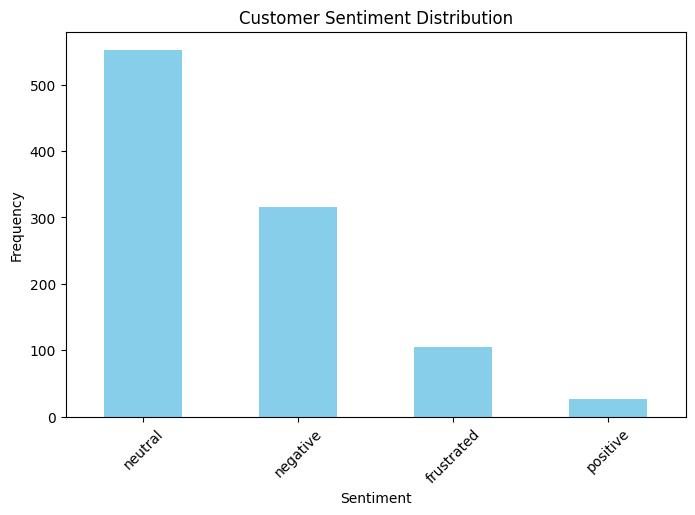

In [2]:

# Display initial information about the dataset
print("Dataset loaded successfully.\n")
print("First few rows of the dataset:\n", data_df.head())
print("\nDataset info:")
data_df.info()
print("\nDataset description:\n", data_df.describe(include="all"))

# 1. Customer Sentiment Distribution
if 'customer_sentiment' in data_df.columns:
    sentiment_counts = data_df['customer_sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Customer Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



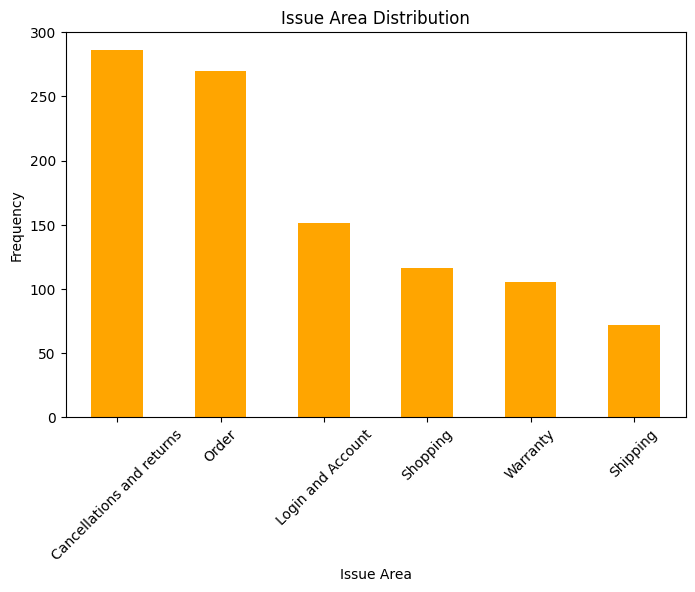

In [3]:
# 2. Issue Area Distribution
if 'issue_area' in data_df.columns:
    issue_area_counts = data_df['issue_area'].value_counts()
    plt.figure(figsize=(8, 5))
    issue_area_counts.plot(kind='bar', color='orange')
    plt.title('Issue Area Distribution')
    plt.xlabel('Issue Area')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



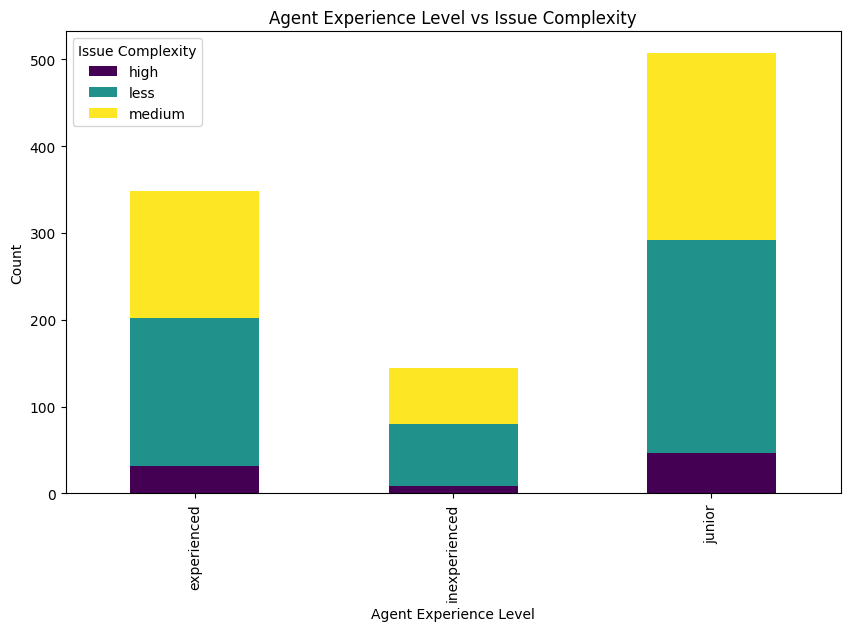

In [4]:
# 3. Agent Experience Level vs Issue Complexity
if 'agent_experience_level' in data_df.columns and 'issue_complexity' in data_df.columns:
    agent_experience_complexity = data_df.groupby(['agent_experience_level', 'issue_complexity']).size().unstack()
    agent_experience_complexity.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title('Agent Experience Level vs Issue Complexity')
    plt.xlabel('Agent Experience Level')
    plt.ylabel('Count')
    plt.legend(title='Issue Complexity')
    plt.show()



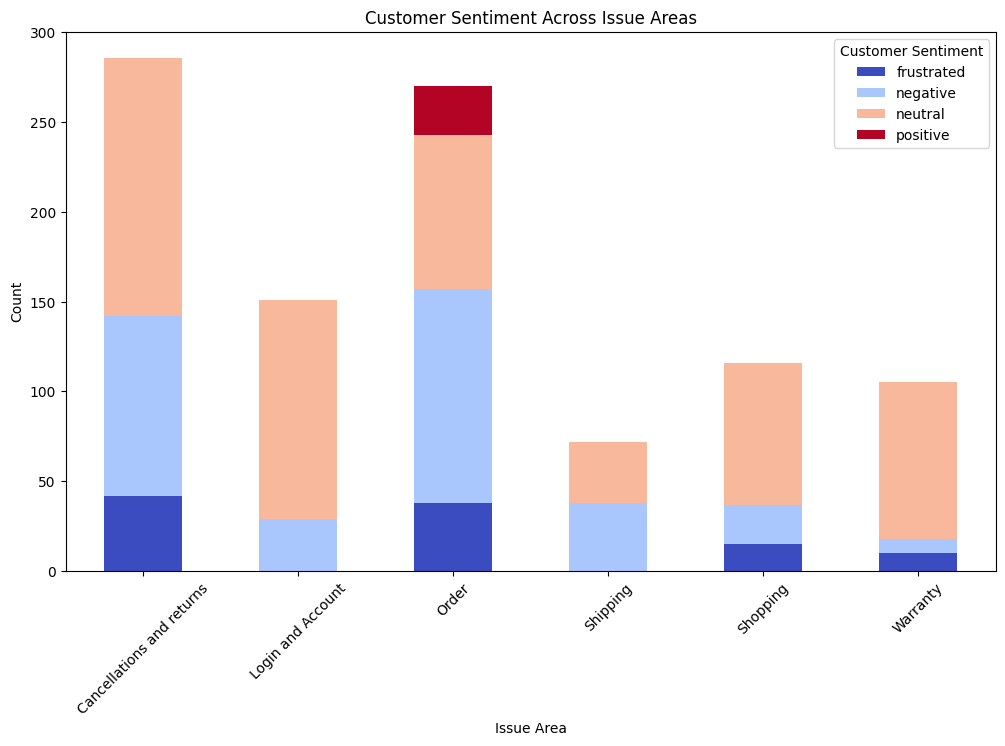

In [5]:
# 4. Customer Sentiment Across Issue Areas
if 'issue_area' in data_df.columns and 'customer_sentiment' in data_df.columns:
    sentiment_issue_area = data_df.groupby(['issue_area', 'customer_sentiment']).size().unstack()
    sentiment_issue_area.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
    plt.title('Customer Sentiment Across Issue Areas')
    plt.xlabel('Issue Area')
    plt.ylabel('Count')
    plt.legend(title='Customer Sentiment')
    plt.xticks(rotation=45)
    plt.show()



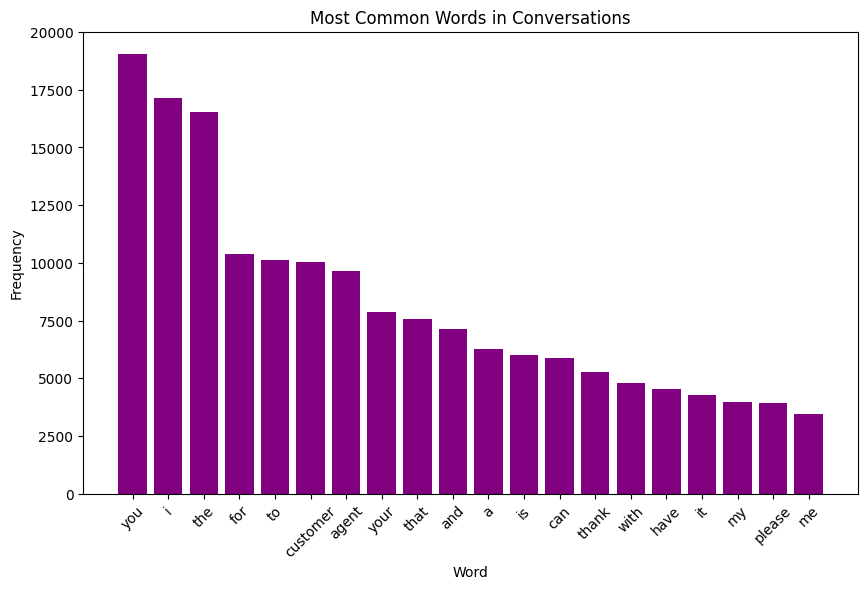

In [6]:
# 5. Most Common Words in Conversations
if 'conversation' in data_df.columns:
    all_text = " ".join(data_df['conversation'].dropna())
    tokens = re.findall(r'\b\w+\b', all_text.lower())
    common_words = Counter(tokens).most_common(20)

    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='purple')
    plt.title('Most Common Words in Conversations')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()